In [ ]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from transformers import BertTokenizer, TFBertForSequenceClassification
import tensorflow as tf
from sklearn.preprocessing import LabelEncoder
import numpy as np

# Load datasets (Ensure that the CSV files are in the same directory)
df_train = pd.read_csv('training.csv')
df_test = pd.read_csv('test.csv')
df_val = pd.read_csv('validation.csv')

# Combine datasets into a single DataFrame for processing
df = pd.concat([df_train, df_test, df_val], ignore_index=True)

# Check the DataFrame
print(df.head())

# Step 2: Preprocess the text data
# Convert emotion labels to numerical values
label_encoder = LabelEncoder()
df['label'] = label_encoder.fit_transform(df['label'])

# Prepare input texts and labels
X = df['text'].tolist()
y = df['label'].tolist()

# Step 3: Tokenize text using BERT tokenizer
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
X_tokenized = tokenizer(X, padding=True, truncation=True, max_length=128, return_tensors='np')

# Extract input IDs and attention masks as NumPy arrays
X_input_ids = np.array(X_tokenized['input_ids'])
X_attention_mask = np.array(X_tokenized['attention_mask'])

# Step 4: Train-test split
X_train_ids, X_test_ids, X_train_mask, X_test_mask, y_train, y_test = train_test_split(
    X_input_ids, X_attention_mask, y, test_size=0.2, random_state=42
)

# Convert labels to tensors
y_train = tf.convert_to_tensor(y_train)
y_test = tf.convert_to_tensor(y_test)

# Step 5: Load the pre-trained BERT model for sequence classification
model = TFBertForSequenceClassification.from_pretrained('bert-base-uncased', num_labels=len(set(y)))

# Compile the model with optimizer and loss
optimizer = tf.keras.optimizers.Adam(learning_rate=2e-5, epsilon=1e-08)
loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)
metrics = ['accuracy']

model.compile(optimizer=optimizer, loss=loss, metrics=metrics)

# Step 6: Train the model with minimum epochs (1 epoch)
history = model.fit(
    [X_train_ids, X_train_mask], 
    y_train, 
    validation_data=([X_test_ids, X_test_mask], y_test),
    epochs=1,  # Reduced to minimum epochs
    batch_size=16
)

# Step 7: Evaluate the model
eval_result = model.evaluate([X_test_ids, X_test_mask], y_test)
print(f"Evaluation Result: {eval_result}")

# Step 8: Predict emotion for new text
def predict_emotion(text):
    # Tokenize input text
    inputs = tokenizer(text, return_tensors="tf", padding=True, truncation=True, max_length=128)
    input_ids = inputs['input_ids']
    attention_mask = inputs['attention_mask']
    
    # Get model prediction
    outputs = model([input_ids, attention_mask])
    logits = outputs.logits
    prediction = tf.argmax(logits, axis=-1).numpy()
    
    # Convert prediction to label
    emotion_label = label_encoder.inverse_transform(prediction)
    return emotion_label[0]

# Example prediction
new_text = "im updating my blog because i feel shitty."
predicted_emotion = predict_emotion(new_text)
print(f'The predicted emotion is: {predicted_emotion}')

In [1]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from transformers import BertTokenizer, TFBertForSequenceClassification
import tensorflow as tf
from sklearn.preprocessing import LabelEncoder
import numpy as np

# Load datasets (Ensure that the CSV files are in the same directory)
df_train = pd.read_csv('training.csv')
df_test = pd.read_csv('test.csv')
df_val = pd.read_csv('validation.csv')

# Combine datasets into a single DataFrame for processing
df = pd.concat([df_train, df_test, df_val], ignore_index=True)

# Check the DataFrame
print(df.head())

# Step 2: Preprocess the text data
# Convert emotion labels to numerical values
label_encoder = LabelEncoder()
df['label'] = label_encoder.fit_transform(df['label'])

# Prepare input texts and labels
X = df['text'].tolist()
y = df['label'].tolist()

# Step 3: Tokenize text using BERT tokenizer
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
X_tokenized = tokenizer(X, padding=True, truncation=True, max_length=128, return_tensors='np')

# Extract input IDs and attention masks as NumPy arrays
X_input_ids = np.array(X_tokenized['input_ids'])
X_attention_mask = np.array(X_tokenized['attention_mask'])

# Step 4: Train-test split
X_train_ids, X_test_ids, X_train_mask, X_test_mask, y_train, y_test = train_test_split(
    X_input_ids, X_attention_mask, y, test_size=0.2, random_state=42
)

# Convert labels to tensors
y_train = tf.convert_to_tensor(y_train)
y_test = tf.convert_to_tensor(y_test)

# Step 5: Load the pre-trained BERT model for sequence classification
model = TFBertForSequenceClassification.from_pretrained('bert-base-uncased', num_labels=len(set(y)))

# Compile the model with optimizer and loss
optimizer = tf.keras.optimizers.Adam(learning_rate=2e-5, epsilon=1e-08)
loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)
metrics = ['accuracy']

model.compile(optimizer=optimizer, loss=loss, metrics=metrics)

# Step 6: Train the model with minimum epochs (1 epoch)
history = model.fit(
    [X_train_ids, X_train_mask], 
    y_train, 
    validation_data=([X_test_ids, X_test_mask], y_test),
    epochs=1,  # Reduced to minimum epochs
    batch_size=16
)

# Step 7: Evaluate the model
eval_result = model.evaluate([X_test_ids, X_test_mask], y_test)
print(f"Evaluation Result: {eval_result}")

# Step 8: Predict emotion for new text
def predict_emotion(text):
    # Tokenize input text
    inputs = tokenizer(text, return_tensors="tf", padding=True, truncation=True, max_length=128)
    input_ids = inputs['input_ids']
    attention_mask = inputs['attention_mask']
    
    # Get model prediction
    outputs = model([input_ids, attention_mask])
    logits = outputs.logits
    prediction = tf.argmax(logits, axis=-1).numpy()
    
    # Convert prediction to label
    emotion_label = label_encoder.inverse_transform(prediction)
    return emotion_label[0]

# Example prediction
new_text = "im updating my blog because i feel shitty."
predicted_emotion = predict_emotion(new_text)
print(f'The predicted emotion is: {predicted_emotion}')

                                                text  label
0                            i didnt feel humiliated      0
1  i can go from feeling so hopeless to so damned...      0
2   im grabbing a minute to post i feel greedy wrong      3
3  i am ever feeling nostalgic about the fireplac...      2
4                               i am feeling grouchy      3


All PyTorch model weights were used when initializing TFBertForSequenceClassification.

Some weights or buffers of the TF 2.0 model TFBertForSequenceClassification were not initialized from the PyTorch model and are newly initialized: ['classifier.weight', 'classifier.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


125/125 [==============================] - 521s 4s/step - loss: 0.1684 - accuracy: 0.9298
Evaluation Result: [0.16838784515857697, 0.9297500252723694]
The predicted emotion is: 0


In [5]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Step 7: Evaluate the model (already done in your code)
eval_result = model.evaluate([X_test_ids, X_test_mask], y_test)
print(f"Evaluation Result: {eval_result}")

# Step 8: Predictions for test set
y_pred_logits = model.predict([X_test_ids, X_test_mask])
y_pred = tf.argmax(y_pred_logits.logits, axis=-1).numpy()




125/125 [==============================] - 420s 3s/step - loss: 0.1684 - accuracy: 0.9298
Evaluation Result: [0.16838784515857697, 0.9297500252723694]
125/125 [==============================] - 426s 3s/step


Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.96      0.97      1173
           1       0.98      0.92      0.95      1339
           2       0.78      0.95      0.86       335
           3       0.91      0.96      0.93       536
           4       0.88      0.89      0.89       458
           5       0.91      0.70      0.79       159

    accuracy                           0.93      4000
   macro avg       0.90      0.90      0.90      4000
weighted avg       0.93      0.93      0.93      4000



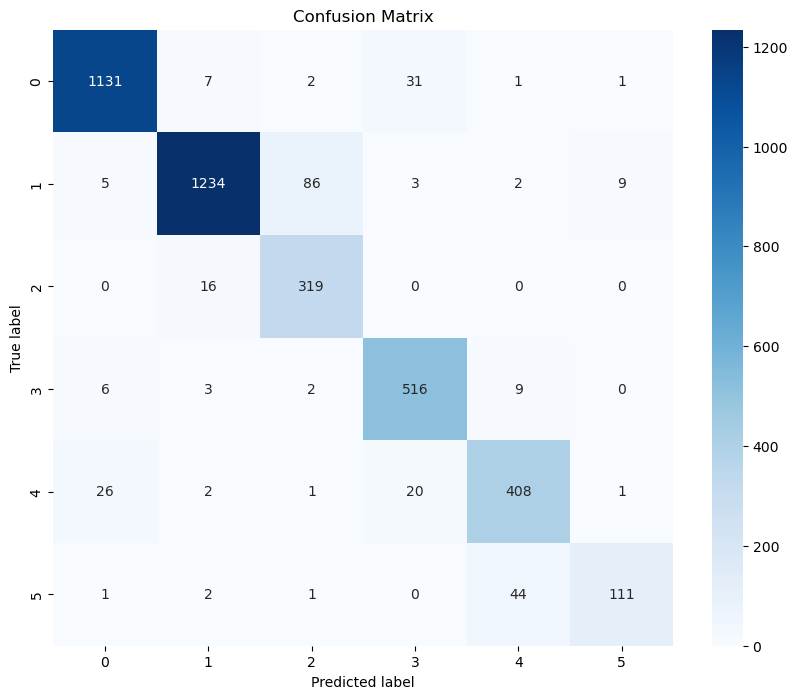

In [9]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt


# Convert y_test tensor to numpy array
y_test_numpy = y_test.numpy()

# Step 9: Ensure target names are strings
# Get class labels as strings
if label_encoder.classes_.dtype == 'int64' or label_encoder.classes_.dtype == 'int32':
    target_names = [str(class_label) for class_label in label_encoder.classes_]
else:
    target_names = list(label_encoder.classes_)

print("Classification Report:")
print(classification_report(y_test_numpy, y_pred, target_names=target_names))

# Step 10: Generate the confusion matrix
conf_matrix = confusion_matrix(y_test_numpy, y_pred)

# Step 11: Visualize the confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=target_names,
            yticklabels=target_names)
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.title('Confusion Matrix')
plt.show()


In [10]:
from sklearn.metrics import precision_score, recall_score, f1_score, roc_curve, auc
import matplotlib.pyplot as plt


In [12]:
# Calculate precision, recall, and F1-score
precision = precision_score(y_test.numpy(), y_pred, average='weighted')
recall = recall_score(y_test.numpy(), y_pred, average='weighted')
f1 = f1_score(y_test.numpy(), y_pred, average='weighted')

print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")


Precision: 0.9336778003712163
Recall: 0.92975
F1 Score: 0.9300215361100509


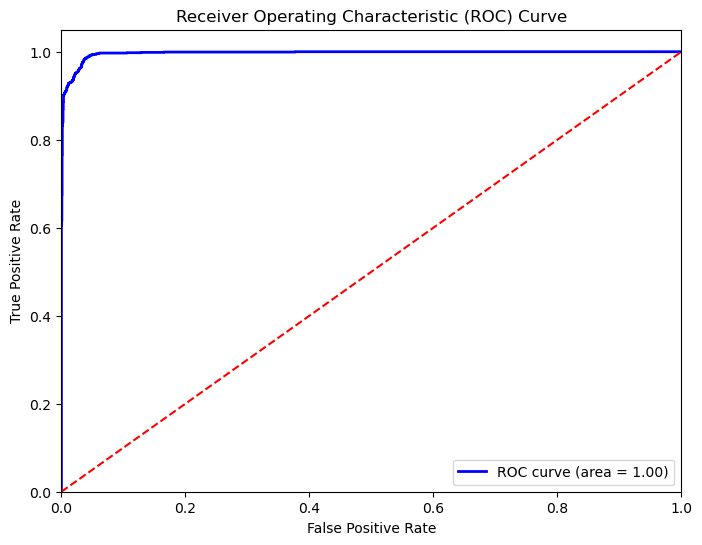

In [13]:
# Get predicted probabilities for each class
y_pred_probs = tf.nn.softmax(y_pred_logits.logits, axis=-1).numpy()

# Compute ROC curve and ROC area for each class
fpr, tpr, thresholds = roc_curve(y_test.numpy(), y_pred_probs[:, 1], pos_label=1)  # Change pos_label according to your dataset
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='red', linestyle='--')  # Diagonal line
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()


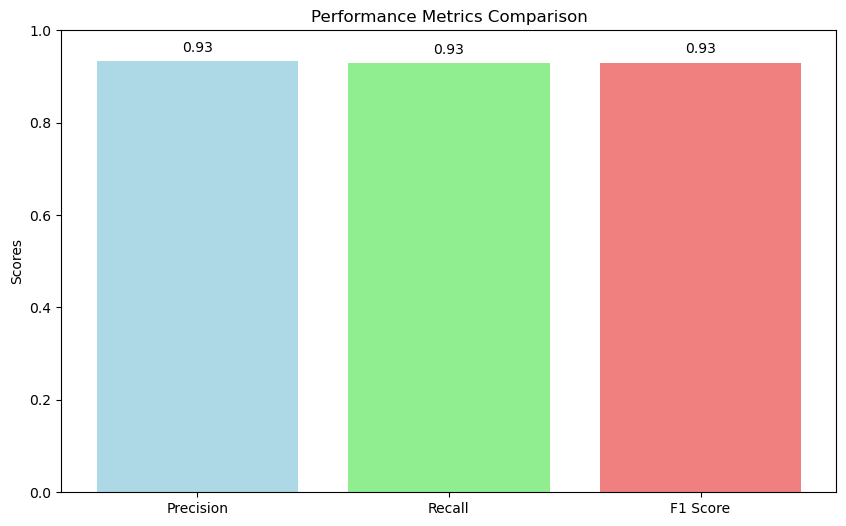

In [14]:
# Bar graph for precision, recall, and F1 score
metrics = ['Precision', 'Recall', 'F1 Score']
values = [precision, recall, f1]

plt.figure(figsize=(10, 6))
plt.bar(metrics, values, color=['lightblue', 'lightgreen', 'lightcoral'])
plt.ylim(0, 1)  # Set y-axis limits to [0, 1]
for i, value in enumerate(values):
    plt.text(i, value + 0.02, f"{value:.2f}", ha='center')
__
plt.title('Performance Metrics Comparison')
plt.ylabel('Scores')
plt.show()


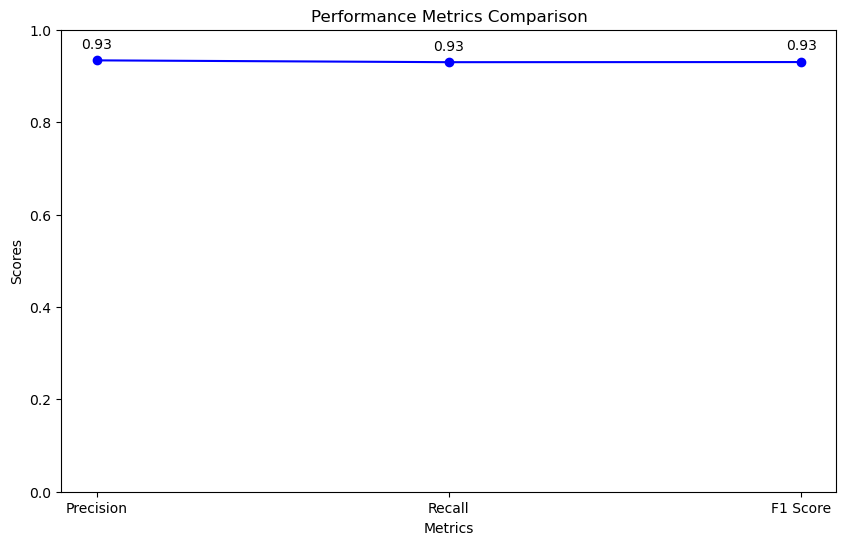

In [15]:
import matplotlib.pyplot as plt

# Define the metrics and their values
metrics = ['Precision', 'Recall', 'F1 Score']
values = [precision, recall, f1]

# Create the line plot
plt.figure(figsize=(10, 6))
plt.plot(metrics, values, marker='o', color='b', linestyle='-')  # Line plot with markers
plt.ylim(0, 1)  # Set y-axis limits to [0, 1]

# Annotate the values on the plot
for i, value in enumerate(values):
    plt.text(i, value + 0.02, f"{value:.2f}", ha='center', va='bottom')

# Set the title and labels
plt.title('Performance Metrics Comparison')
plt.ylabel('Scores')
plt.xlabel('Metrics')

# Show the plot
plt.show()


In [16]:
import numpy as np
from keras.models import load_model
from transformers import BertTokenizer, TFBertForSequenceClassification
import random

# Load pre-trained CNN model for image emotion detection
cnn_model = load_model('path_to_your_cnn_model.h5')  # Update with your model path

# Load pre-trained BERT model for text emotion detection
bert_model = TFBertForSequenceClassification.from_pretrained('bert-base-uncased')
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')

# Function to predict emotion from an image
def predict_image_emotion(image):
    processed_image = preprocess_image(image)  # Your image preprocessing function
    prediction = cnn_model.predict(np.expand_dims(processed_image, axis=0))
    emotion = np.argmax(prediction)
    return map_emotion_to_label(emotion)  # Your function to map prediction to labels

# Function to predict emotion from text
def predict_text_emotion(text):
    inputs = tokenizer(text, return_tensors="tf")
    outputs = bert_model(inputs)
    logits = outputs.logits
    emotion = np.argmax(logits.numpy())
    return map_emotion_to_label(emotion)  # Your function to map prediction to labels

# Function to generate content based on emotion and age group
def generate_content(emotion, age_group):
    if age_group == 'child':
        return generate_cartoon(emotion)
    elif age_group == 'adult':
        return generate_poem(emotion)
    elif age_group == 'senior':
        return generate_music(emotion)

# Example content generation functions
def generate_cartoon(emotion):
    cartoons = {
        "happy": "Playing a cheerful cartoon for kids.",
        "sad": "Showing a comforting cartoon for kids.",
        "angry": "Displaying a calming cartoon for kids."
    }
    return cartoons.get(emotion, "Default cartoon for kids.")

def generate_poem(emotion):
    poems = {
        "happy": "Reciting a joyful poem for adults.",
        "sad": "Reciting a soothing poem for adults.",
        "angry": "Reading a relaxing poem for adults."
    }
    return poems.get(emotion, "Default poem for adults.")

def generate_music(emotion):
    music = {
        "happy": "Playing upbeat music for seniors.",
        "sad": "Playing soft and calming music for seniors.",
        "angry": "Playing peaceful music for seniors."
    }
    return music.get(emotion, "Default music for seniors.")

# Main function to run emotion detection and content generation
def main(image, text, age_group):
    image_emotion = predict_image_emotion(image)
    text_emotion = predict_text_emotion(text)

    # Check if both emotions match
    if image_emotion == text_emotion:
        print(f"Emotion detected: {image_emotion}")
        content = generate_content(image_emotion, age_group)
        print(f"Generated Content: {content}")
    else:
        print("Emotions from image and text do not match. Please try again.")

# Example usage
image = "path_to_image.jpg"  # Your image path
text = "I am feeling so happy today!"  # Example text
age_group = "adult"  # Options: 'child', 'adult', 'senior'

main(image, text, age_group)


OSError: No file or directory found at path_to_your_cnn_model.h5